# Replacing the CEO funds an average startup 1M more dollars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# milestone = pd.read_csv("../data/milestones.csv")
objects = pd.read_csv("../data/objects_c.csv")
relationships = pd.read_csv("../data/relationships.csv")
people = pd.read_csv("../data/people.csv")
funding_rounds = pd.read_csv("../data/funding_rounds.csv")

In [3]:
# funding_rounds = funding_rounds.replace(to_replace="crowd", value="0")
# funding_rounds = funding_rounds.replace(to_replace="crowd_equity", value="0")
# funding_rounds = funding_rounds.replace(to_replace="seed", value="1")
# funding_rounds = funding_rounds.replace(to_replace="angel", value="2")
# funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "debt_round"]
# funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "post_ipo_debt"]
# funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "convertible"]
funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "grant"]
funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "crowd"]
funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "crowd_equity"]
funding_rounds = funding_rounds[funding_rounds['raised_amount_usd'] != 0]

In [4]:
# Switching timestamp to phase
funding_rounds["funding_round_num"] = funding_rounds.groupby("object_id")["funded_at"].rank("dense", ascending=True)

In [5]:
# Funding matrix
funding_matrix = funding_rounds.pivot_table(values="raised_amount_usd",
                           index="object_id",
                           columns='funding_round_num')
funding_matrix = funding_matrix.pct_change(axis=1) # Use percentage change
funding_matrix = funding_matrix[funding_matrix[2] !=0]
funding_matrix

funding_round_num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
object_id,,,,,,,,,,,,,,,
c:1,NaN,0.809524,1.631579,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:10015,NaN,3.500000,-0.770089,4.799343,2.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:100155,NaN,16.319801,-0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:10018,NaN,0.250000,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:100238,NaN,1.424242,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c:9939,NaN,4.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:994,NaN,4.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:9949,NaN,41.000000,-0.285714,15.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
relationships['isCEO'] = relationships.title.apply(lambda x: "CEO" in str(x) or
                                                   "Chief Executive Officer" in str(x))

relationships_CEO = relationships[relationships['isCEO']]              # Select CEO
relationships_CEO = relationships_CEO[relationships_CEO['is_past']==1] # Select Past CEO
# Past CEOs that have registered end date
relationships_CEO = relationships_CEO[np.logical_not(relationships_CEO.end_at.isna())] 

In [7]:
ct = relationships_CEO.groupby("relationship_object_id").count()['isCEO']
ct = ct[ct==1] # Select one CEO changes

In [8]:
relationships_CEO = relationships_CEO.merge(ct.reset_index(), how="right", left_on="relationship_object_id",
                        right_on="relationship_object_id")

In [9]:
fd_rounds = funding_rounds.merge(relationships_CEO[['relationship_object_id', 'end_at']],
                     how='left', left_on='object_id',
                     right_on='relationship_object_id', copy=False)
fd_rounds['CEO_changed'] = fd_rounds['end_at'] <= fd_rounds['funded_at']

In [10]:
fd_rounds[fd_rounds.CEO_changed == True]

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,is_last_round,source_url,source_description,created_by,created_at,updated_at,funding_round_num,relationship_object_id,end_at,CEO_changed
20,22,22,c:30,2007-06-01,series-a,a,12500000.0,12500000.0,USD,0.0,...,0,"http://www.powerset.com/press/seriesa, http://...",NaN,initial-importer,2007-06-11 19:36:06,2008-05-13 15:59:39,3.0,c:30,1984-10-27,True
119,133,133,c:156,2006-10-01,series-b,b,4000000.0,4000000.0,USD,0.0,...,0,NaN,NaN,initial-importer,2007-07-12 12:19:32,2008-03-12 01:07:22,2.0,c:156,2006-01-01,True
120,134,134,c:156,2007-07-01,series-c+,c,15000000.0,15000000.0,USD,0.0,...,0,NaN,NaN,initial-importer,2007-07-12 12:21:23,2008-03-12 01:07:22,3.0,c:156,2006-01-01,True
211,238,238,c:264,2007-07-01,series-a,a,5000000.0,5000000.0,USD,0.0,...,1,NaN,NaN,initial-importer,2007-07-25 10:43:40,2008-05-15 23:18:22,1.0,c:264,2006-11-01,True
333,387,387,c:401,2007-08-01,series-a,a,5500000.0,5500000.0,USD,0.0,...,1,NaN,NaN,initial-importer,2007-08-22 04:30:58,2008-02-25 00:24:19,1.0,c:401,2005-01-01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45884,57704,57704,c:31683,2010-04-22,venture,unattributed,6100125.0,6100125.0,USD,0.0,...,0,http://www.sec.gov/Archives/edgar/data/1391913...,SEC,amit2013,2013-12-11 11:05:00,2013-12-11 11:05:00,5.0,c:31683,2010-01-31,True
45967,57807,57807,c:38811,2013-12-11,series-c+,c,100000000.0,100000000.0,USD,0.0,...,0,http://gigaom.com/2013/12/11/shopify-raises-10...,Shopify raises $100 million Series C to expand...,arun,2013-12-12 05:12:53,2013-12-12 05:12:53,3.0,c:38811,2008-05-01,True
46032,57885,57885,c:17284,2010-04-08,venture,partial,3678786.0,3678786.0,USD,0.0,...,0,http://www.sec.gov/Archives/edgar/data/1112314...,SEC,prasant2013,2013-12-12 10:57:07,2013-12-12 10:57:07,4.0,c:17284,2010-01-01,True
46034,57887,57887,c:238878,2010-02-01,other,debt_round,5000000.0,5000000.0,USD,0.0,...,1,http://www.sec.gov/Archives/edgar/data/1421000...,SEC,santosh2013,2013-12-12 11:01:46,2013-12-12 11:01:46,1.0,c:238878,2009-01-01,True


In [11]:
fd = fd_rounds[fd_rounds.CEO_changed == True].groupby("object_id")['funding_round_num'].min()
fd = fd.reset_index()
fd

,object_id,funding_round_num
0,c:10139,2.0
1,c:104321,1.0
2,c:1056,3.0
3,c:1071,2.0
4,c:10716,3.0
...,...,...
513,c:9467,2.0
514,c:95,4.0
515,c:9668,1.0
516,c:9743,5.0


In [12]:
# Merge with CEO change round
X = funding_matrix.merge(fd, how='left', left_on='object_id', right_on='object_id')

# Only select those that have websites
X = X.merge(objects[['id', 'has_website']], left_on='object_id', right_on='id', how='left')

X = X[X.has_website==1]

In [13]:
for i in range(7,16):
  del X[i]

In [14]:
# Sinse we restrict funding round to the first 6
# if funding round > 6, we set them NaN

X.loc[X.funding_round_num >= 6, "funding_round_num"] = pd.NA
X.loc[X.funding_round_num == 1, "funding_round_num"] = pd.NA

In [15]:
np.logical_not(X.funding_round_num.isna()).sum()

44

In [16]:
X.to_csv("../data/synthetic_matrix.csv")

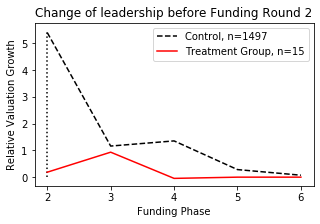

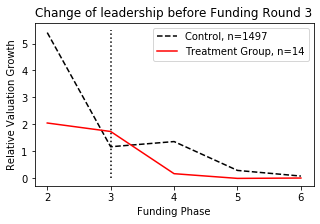

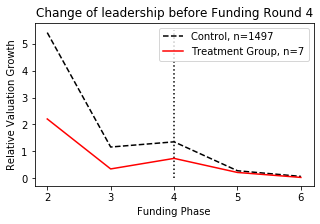

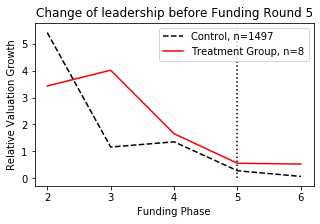

In [43]:
plt.figure(figsize=(5,3))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 2].iloc[:, 2:7].mean(), "r")
plt.vlines(2, ymin=0, ymax=5.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 2")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 2).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])
plt.show()

plt.figure(figsize=(5,3))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 3].iloc[:, 2:7].mean(), "r")
plt.vlines(3, ymin=0, ymax=5.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 3")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 3).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])
plt.show()


plt.figure(figsize=(5,3))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 4].iloc[:, 2:7].mean(), "r")
plt.vlines(4, ymin=0, ymax=5.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 4")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 4).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])
plt.show()

plt.figure(figsize=(5,3))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 5].iloc[:, 2:7].mean(), "r")
plt.vlines(5, ymin=0, ymax=5.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 5")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 5).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])
plt.show()

Continue to process this data with R, and read back the results

In [79]:
estimated_matrix = pd.read_csv("../data/L0.csv", index_col=0).round(5)

# Use category
# estimated_matrix = pd.read_csv("../data/L1.csv", delimiter=' ', header=None).round(5)

estimated_matrix

,V1,V2,V3,V4
1,-3.13391,1.89658,0.08768,1.14965
2,-2.36131,-2.42296,2.96915,1.81512
3,9.03169,-3.57968,-3.25700,-2.19502
4,-3.27066,1.18777,0.51045,1.57243
5,-2.26498,0.51921,0.34189,1.40387
...,...,...,...,...
1537,-2.50191,0.38152,0.52920,1.59118
1538,-2.58316,0.62527,0.44795,1.50993
1539,-2.91649,0.73639,0.55907,1.62104
1540,-0.33316,-0.12473,-0.30205,0.75993


In [80]:
TrEffect = pd.concat([(X.iloc[:,2:-4] - np.array(estimated_matrix)),
                X.funding_round_num], axis=1)
TrEffect

,2.0,3.0,4.0,5.0,funding_round_num
0,3.943434,-0.265001,-0.087680,-1.149650,NaN
1,5.861310,1.652871,1.830193,0.768213,NaN
2,7.288111,3.079680,3.257000,2.195020,NaN
3,3.520660,-0.687770,-0.510450,-1.572430,NaN
4,3.689222,-0.519210,-0.341890,-1.403870,NaN
...,...,...,...,...,...
9521,3.501910,-0.706520,-0.529200,-1.591180,NaN
9523,3.583160,-0.625270,-0.447950,-1.509930,NaN
9525,3.472046,-0.736390,-0.559070,-1.621040,NaN
9526,4.333160,0.124730,0.302050,-0.759930,NaN


In [81]:
TrEffect4Tred = TrEffect.dropna()
one_term = []
for i in range(TrEffect4Tred.shape[0]):
  idx = TrEffect4Tred.iloc[i, -1]
  to_choose = int(max(0, idx-2))
  one_term.append(TrEffect4Tred.iloc[i, to_choose])

In [82]:
TrEffect4Tred['one_term']=one_term
TrEffect4Tred

/Users/chenyangzhu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,2.0,3.0,4.0,5.0,funding_round_num,one_term
80,1.239840,1.500040,0.000070,0.000040,3.0,1.500040
123,-0.906250,0.666667,0.000000,0.000000,2.0,-0.906250
167,0.549296,-0.727273,0.000000,0.000000,2.0,0.549296
205,3.000000,-0.250000,0.000000,0.000000,2.0,3.000000
225,3.558007,-0.650425,-0.473105,0.985550,5.0,0.985550
245,2.599840,1.000040,0.561181,-0.181455,3.0,1.000040
327,5.054880,0.846442,1.023771,-0.150520,5.0,-0.150520
353,3.257380,-0.244589,0.000070,0.000040,3.0,-0.244589
403,-0.923077,0.000000,0.000000,0.000000,2.0,-0.923077
414,3.430233,-0.778197,-0.600879,-0.603930,5.0,-0.603930


In [83]:
TrEffect4Tred[TrEffect4Tred.funding_round_num == 5]

,2.0,3.0,4.0,5.0,funding_round_num,one_term
225,3.558007,-0.650425,-0.473105,0.985550,5.0,0.985550
327,5.054880,0.846442,1.023771,-0.150520,5.0,-0.150520
414,3.430233,-0.778197,-0.600879,-0.603930,5.0,-0.603930
1087,3.346120,-0.862310,-0.684992,-1.231040,5.0,-1.231040
1121,5.968750,1.760319,1.937640,0.944533,5.0,0.944533
1780,4.187939,-0.020490,0.156824,-1.295340,5.0,-1.295340
2263,3.792505,-0.415931,-0.238607,3.349695,5.0,3.349695
2275,20.531640,16.323210,16.500530,-8.405390,5.0,-8.405390


([<matplotlib.axis.XTick at 0x7fc71b34b510>,
 <a list of 4 Text xticklabel objects>)

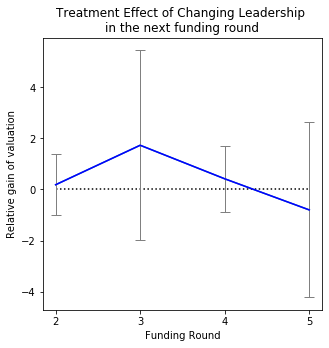

In [84]:
plt.figure(figsize=(5,5))
one_term_mean = TrEffect4Tred[['funding_round_num', 'one_term']].groupby("funding_round_num").mean().to_numpy().reshape([4])
one_term_error = TrEffect4Tred[['funding_round_num', 'one_term']].groupby("funding_round_num").std().to_numpy().reshape([4])
# plt.plot(TrEffect4Tred[['funding_round_num', 'one_term']].groupby("funding_round_num").mean())
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
plt.errorbar(x=[2,3,4,5], 
             y=one_term_mean,
             yerr=one_term_error,
             barsabove=True,
             capsize=5, 
             elinewidth=1,
             markeredgewidth=1,
             ecolor='grey')
plt.plot([2,3,4,5], one_term_mean, 'b-')
plt.title("Treatment Effect of Changing Leadership \nin the next funding round")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
plt.xticks([2,3,4,5])

([<matplotlib.axis.XTick at 0x7fc71b69eed0>,
 <a list of 4 Text xticklabel objects>)

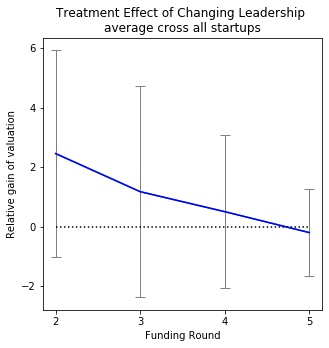

In [85]:
plt.figure(figsize=(5,5))
# plt.plot(X.iloc[1:6, 2:-3])
plt.errorbar(x=[2,3,4,5],
             y=TrEffect4Tred.iloc[:, :-2].mean(), 
             yerr=TrEffect4Tred.iloc[:, :-2].std(),
             barsabove=True,
             capsize=5, 
             elinewidth=1,
             markeredgewidth=1,
             ecolor='grey')
plt.plot(TrEffect4Tred.iloc[:, :-2].mean(), 'b-')
plt.title("Treatment Effect of Changing Leadership \naverage cross all startups")
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
# plt.ylabel("Treatment Effect")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
plt.xticks([2,3,4,5])

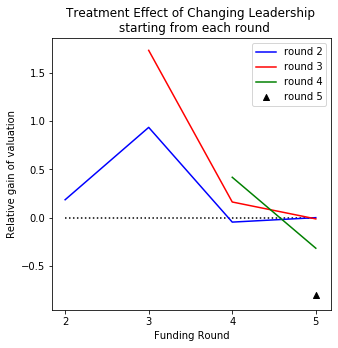

In [86]:
plt.figure(figsize=(5,5))
plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==2].iloc[:, :-2].mean(), 'b-', label="round 2")

plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==3].iloc[:, 1:-2].mean(), 'r-', label="round 3")

plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==4].iloc[:, 2:-2].mean(), 'g-', label="round 4")

plt.scatter(x=5, 
            y=TrEffect4Tred[TrEffect4Tred['funding_round_num']==5].iloc[:, 3:-2].mean(),
            label="round 5", color="black", marker='^')

plt.title("Treatment Effect of Changing Leadership \n starting from each round")
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
# plt.ylabel("Treatment Effect")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
plt.xticks([2,3,4,5])
plt.legend()
plt.show()

([<matplotlib.axis.XTick at 0x7fc71b31c810>,
 <a list of 4 Text xticklabel objects>)

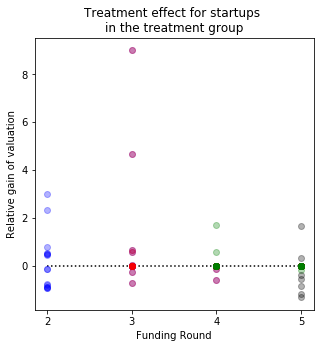

In [87]:
plt.figure(figsize=(5,5))

plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==2].iloc[:, :-2].T,
         linestyle="None", marker="o", c='blue', alpha=0.3)

plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==2].iloc[:, 1:-2].T,
         linestyle="None", marker="o", c='red', alpha=0.3)

plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==3].iloc[:, 2:-2].T,
         linestyle="None", marker="o", c='green', alpha=0.3)

plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==4].iloc[:, 3:-2].T,
         linestyle="None", marker="o", c='black', alpha=0.3)

plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")

plt.title("Treatment effect for startups \nin the treatment group")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
plt.xticks([2,3,4,5])

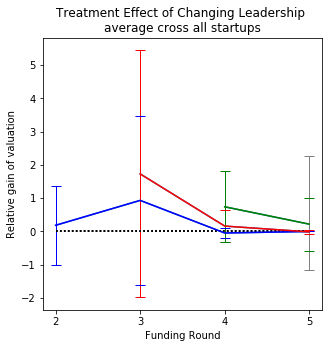

In [33]:
plt.figure(figsize=(5,5))
# plt.plot(X.iloc[1:6, 2:-3])
plt.errorbar(x=[2,3,4,5],
             y=TrEffect4Tred[TrEffect4Tred['funding_round_num']==2].iloc[:, :-2].mean(), 
             yerr=TrEffect4Tred[TrEffect4Tred['funding_round_num']==2].iloc[:, :-2].std(),
             barsabove=True,
             capsize=5, 
             elinewidth=1,
             markeredgewidth=1,
             ecolor='b')
plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==2].iloc[:, :-2].mean(), 'b-')
plt.title("Treatment Effect of Changing Leadership \n at Round 2")
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
# plt.ylabel("Treatment Effect")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
plt.xticks([2,3,4,5])
# plt.show()

# plt.figure(figsize=(5,5))
# plt.plot(X.iloc[1:6, 2:-3])
plt.errorbar(x=[3,4,5],
             y=TrEffect4Tred[TrEffect4Tred['funding_round_num']==3].iloc[:, 1:-2].mean(), 
             yerr=TrEffect4Tred[TrEffect4Tred['funding_round_num']==3].iloc[:, 1:-2].std(),
             barsabove=True,
             capsize=5, 
             elinewidth=1,
             markeredgewidth=1,
             ecolor='red')
plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==3].iloc[:, 1:-2].mean(), 'r-')
plt.title("Treatment Effect of Changing Leadership \n at Round 3")
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
# plt.ylabel("Treatment Effect")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
# plt.xticks([2,3,4,5])
# plt.show()

# plt.figure(figsize=(5,5))
# plt.plot(X.iloc[1:6, 2:-3])
plt.errorbar(x=[4,5],
             y=TrEffect4Tred[TrEffect4Tred['funding_round_num']==4].iloc[:, 2:-2].mean(), 
             yerr=TrEffect4Tred[TrEffect4Tred['funding_round_num']==4].iloc[:, 2:-2].std(),
             barsabove=True,
             capsize=5, 
             elinewidth=1,
             markeredgewidth=1,
             ecolor='green')
plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==4].iloc[:, 2:-2].mean(), 'g-')
plt.title("Treatment Effect of Changing Leadership \n at Round 4")
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
# plt.ylabel("Treatment Effect")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
# plt.xticks([2,3,4,5])
# plt.show()

# plt.figure(figsize=(5,5))
# plt.plot(X.iloc[1:6, 2:-3])
plt.errorbar(x=[5],
             y=TrEffect4Tred[TrEffect4Tred['funding_round_num']==5].iloc[:, 3:-2].mean(), 
             yerr=TrEffect4Tred[TrEffect4Tred['funding_round_num']==5].iloc[:, 3:-2].std(),
             barsabove=True,
             capsize=5, 
             elinewidth=1,
             markeredgewidth=1,
             ecolor='grey')
plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==5].iloc[:, 3:-2].mean(), '-')
plt.title("Treatment Effect of Changing Leadership \naverage cross all startups")
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
# plt.ylabel("Treatment Effect")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
plt.xticks([2,3,4,5])
plt.show()

([<matplotlib.axis.XTick at 0x7fc71440bf90>,
 <a list of 4 Text xticklabel objects>)

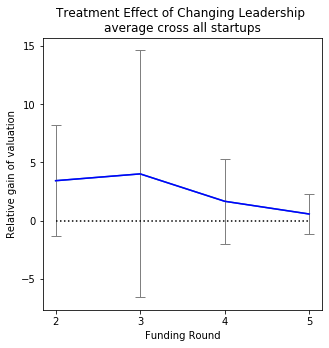

In [34]:
plt.figure(figsize=(5,5))
# plt.plot(X.iloc[1:6, 2:-3])
plt.errorbar(x=[2,3,4,5],
             y=TrEffect4Tred[TrEffect4Tred['funding_round_num']==5].iloc[:, :-2].mean(), 
             yerr=TrEffect4Tred[TrEffect4Tred['funding_round_num']==5].iloc[:, :-2].std(),
             barsabove=True,
             capsize=5, 
             elinewidth=1,
             markeredgewidth=1,
             ecolor='grey')
plt.plot(TrEffect4Tred[TrEffect4Tred['funding_round_num']==5].iloc[:, :-2].mean(), 'b-')
plt.title("Treatment Effect of Changing Leadership \naverage cross all startups")
plt.hlines(0, xmin=2, xmax=5, linestyles="dotted")
# plt.ylabel("Treatment Effect")
plt.ylabel("Relative gain of valuation")
plt.xlabel("Funding Round")
plt.xticks([2,3,4,5])

# Placebo Test

In [82]:
synthetic_x_0 = pd.read_csv("../data/synthetic_x_0.csv", index_col=0).round(5)

In [84]:
synthetic_x_0

,X2.0,X3.0,X4.0,X5.0
1,0.0,-0.0,-0.0,-0.0
2,-0.0,0.0,-0.0,0.0
3,-0.0,0.0,-0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
...,...,...,...,...
1493,0.0,0.0,0.0,0.0
1494,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0
